In [42]:

import pandas as pd

data = pd.read_csv(
    'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
)

print(data.head())


KeyboardInterrupt



In [ ]:
#Check data info
data.info()

# Check missing values
print(data.isnull().sum())

# Statistical summary
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


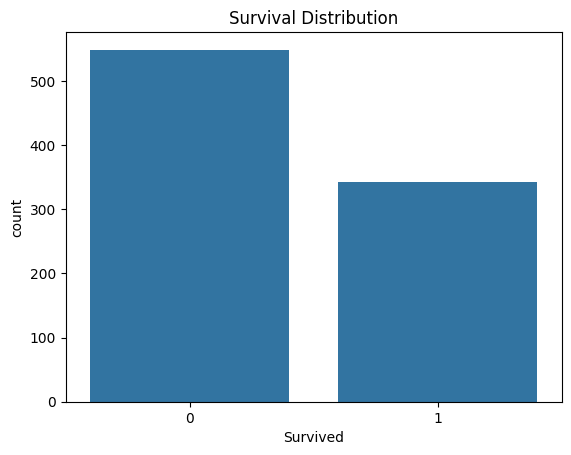

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Survived',
data=data)


plt.title('Survival Distribution')
plt.show()

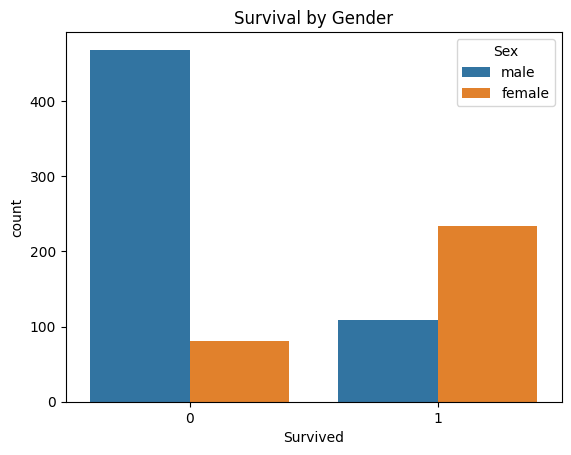

In [ ]:
sns.countplot(x='Survived',
hue='Sex', data=data)


plt.title('Survival by Gender')

plt.show()

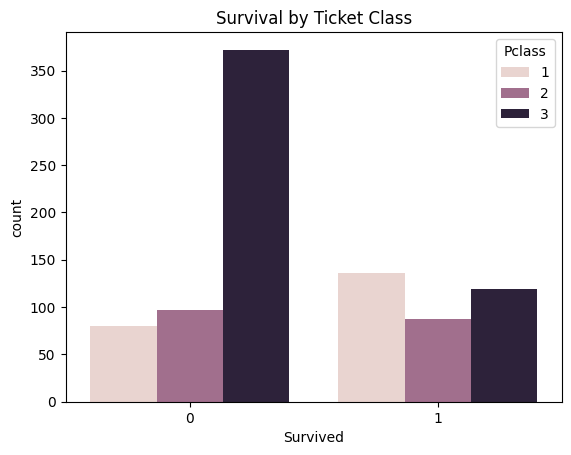

In [ ]:

sns.countplot(x='Survived',
hue='Pclass', data=data)

plt.title('Survival by Ticket Class')

plt.show()

In [ ]:
# Fill missing 'Age' with median
data["Age"] = data["Age"].fillna(data["Age"].median())

# Fill missing 'Embarked' with most frequent value
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

# Drop 'Cabin' (too many missing values)
data = data.drop("Cabin", axis=1)

print(data["Embarked"].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = data[features]
y = data["Survived"]

X = pd.get_dummies(X, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 4))

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", round(precision, 4))

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", round(recall, 4))

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", round(f1, 4))

Confusion Matrix:
 [[90 15]
 [19 55]]
Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1 Score: 0.7639


In [ ]:
import pickle
# Save the trained model

pickle.dump(model,
open('titanic_model.pkl', 'wb'))